In [6]:

import cv2
from PIL import ImageFont,ImageDraw,Image
import numpy as np

src = cv2.imread('sky.png')

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)


#외교관차량
lower_blue = np.array([100,70,70])
upper_blue = np.array([140,255,255])

#운수용
lower_yellow = np.array([15,100,100])
upper_yellow = np.array([30,255,255])

#중장비
lower_orange = np.array([0,190,190])
upper_orange = np.array([255,255,255])

#친환경
lower_sky = np.array([90,70,70])
upper_sky = np.array([100,240,240])

mask_blue = cv2.inRange(src_hsv,lower_blue,upper_blue)
mask_yellow = cv2.inRange(src_hsv,lower_yellow,upper_yellow)
mask_orange = cv2.inRange(src_hsv,lower_orange,upper_orange)
mask_sky = cv2.inRange(src_hsv,lower_sky,upper_sky)

res1 = cv2.bitwise_and(src,src,mask=mask_blue)
res2 = cv2.bitwise_and(src,src,mask=mask_yellow)
res3 = cv2.bitwise_and(src,src,mask=mask_orange)
res4 = cv2.bitwise_and(src,src,mask=mask_sky)

cv2.imshow('src', src)
cv2.imshow('blue', res1)
cv2.imshow('yellow', res2)
cv2.imshow('orange', res3)
cv2.imshow('sky', res4)
cv2.waitKey()

cv2.destroyAllWindows()

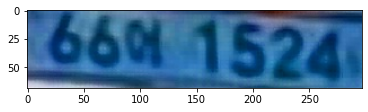

Max Value
R :  0.9254902
G :  0.8980392
B :  0.9490196
0 1 1 0
중장비


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def checkrgb(diplomacy,heavy,carry,echo,r,g,b):
    if 0.47<=r<=0.67:
        echo+=1
    if 0.8<=r<=0.98:
        heavy+=1
    if 0.82<=r<=1:
        carry+=1
    if 0.06<=r<=0.08:
        diplomacy+=1


    if 0.76<=g<=0.85:
        echo+=1
    if 0.43<=g<=0.52:
        heavy+=1
    if 0.69<=g<=0.85:
        carry+=1
    if 0.11<=g<=0.15:
        diplomacy+=1
    

    if 0.9<=b<=0.88:
        echo+=1
    if 0.11<=b<=0.14:
        heavy+=1
    if 0.21<=b<=0.26:
        carry+=1
    if 0.26<=b<=0.32:
        diplomacy+=1
    
    return echo,heavy,carry,diplomacy

img = mpimg.imread('sky.png')
plt.imshow(img)
plt.show()

diplomacy = 0
heavy = 0
carry = 0
echo  = 0
normal = 0

Red = []
Green = []
Blue = []

for x in img:
    for y in x:
        Red.append(y[0])
        Green.append(y[1])
        Blue.append(y[2])

R_max = max(Red)
G_max = max(Green)
B_max = max(Blue)
print("Max Value")
print("R : ", R_max)
print("G : ", G_max)
print("B : ", B_max)

echo,heavy,carry,diplomacy = checkrgb(diplomacy,heavy,carry,echo,R_max,G_max,B_max)
print(echo,heavy,carry,diplomacy)
maximum = max(echo,heavy,carry,diplomacy)

if echo == maximum :
    #return "echo"
    print("친환경")
elif heavy == maximum :
    print("중장비")
elif carry==maximum :
    print("운수")
elif diplomacy == maximum:
    print("외교용")
else :
    print("일반")

